💈 Introduction aux réseaux de neurones artificiels



## Preamble



### Imports



In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from cycler import cycler
import warnings
warnings.filterwarnings("ignore")

import pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

from itertools import product

# Out[24]:

### Functions



In [1]:
# Display all
def display_all(df):
    with pd.option_context("display.max_rows", 100, "display.max_columns", 100): 
        display(df)

# Out[25]:

### Matplotlib setup



In [1]:
import matplotlib.font_manager
[f.name for f in matplotlib.font_manager.fontManager.ttflist]
plt.rcParams['font.family'] = 'Fira Mono'
   
#Financier Style
ft_background = "#FFF1E5"
ft_democratblue = "#0F56B5"
ft_republicanred = "#EF4647"
ft_pink = "#E95D8C"
ft_darkred = "#7D062E"
ft_darkblue = "#065296"
ft_blue = "#2591CE"
ft_lightblue = "#72D9E7"
ft_greenish = "#A2BC5D"
ft_maybegrey = "#716962"
ft_golden = "#B89E17"

tinyfont = 14
smallfont = 20
largefont = 28
linewidth = 5

plt.rcParams['figure.facecolor'] = ft_background
plt.rcParams['axes.facecolor']= ft_background
plt.rcParams['text.color']= ft_maybegrey
plt.rcParams['xtick.color']= ft_maybegrey
plt.rcParams['ytick.color']= ft_maybegrey
plt.rcParams['axes.labelcolor']= ft_maybegrey

plt.rcParams["axes.grid.axis"] ="y"
plt.rcParams["axes.grid"] = True
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True
plt.rcParams['figure.figsize'] = (5, 5)

plt.rcParams['axes.titlesize'] = largefont
plt.rcParams['font.size'] = smallfont
plt.rcParams['xtick.labelsize'] = tinyfont
plt.rcParams['ytick.labelsize'] = tinyfont
plt.rcParams['axes.labelsize']  = smallfont    
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.pad'] = 10
plt.rcParams['ytick.major.size'] = 0
plt.rcParams['ytick.major.pad'] = 10


plt.rcParams['lines.linewidth'] = linewidth
plt.rc('axes', prop_cycle=(cycler('color', [ft_darkblue, ft_blue, ft_lightblue, ft_pink, ft_darkred, ft_greenish])))

# Out[27]:

## Data Loading



### Load Data



In [1]:
train = pd.read_csv('data/train.csv')

# Out[28]:

In [1]:
X = train.drop('MEDV', axis=1)
y = train['MEDV']

# Out[29]:

## Training



In [1]:
n_neurons = np.concatenate([np.arange(2,10), np.arange(10,30,2)])
hls = list(product(n_neurons, repeat=1))
#for n in range(len(n_neurons)):
#    hls[n] = (6,) + hls[n]
#    hls[n] = (6,8,) + hls[n]
#    hls[n] = (6,8,30,) + hls[n]
hls

# Out[30]:
#+BEGIN_EXAMPLE
  [(2,),
  (3,),
  (4,),
  (5,),
  (6,),
  (7,),
  (8,),
  (9,),
  (10,),
  (12,),
  (14,),
  (16,),
  (18,),
  (20,),
  (22,),
  (24,),
  (26,),
  (28,)]
#+END_EXAMPLE

In [1]:
model = MLPRegressor(solver='lbfgs',
                     alpha=0.0001,
                     max_iter=10000,
                     random_state=0,
                     max_fun=15000,
                     verbose=False)

param_grid = {
    'hidden_layer_sizes': hls,
    'activation': ['relu']
}

greg = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=6, cv=3)
greg.fit(X, y)

# Out[31]:
#+BEGIN_EXAMPLE
  GridSearchCV(cv=3,
  estimator=MLPRegressor(max_iter=10000, random_state=0,
  solver='lbfgs'),
  n_jobs=6,
  param_grid={'activation': ['relu'],
  'hidden_layer_sizes': [(2,), (3,), (4,), (5,), (6,),
  (7,), (8,), (9,), (10,), (12,),
  (14,), (16,), (18,), (20,),
  (22,), (24,), (26,), (28,)]})
#+END_EXAMPLE

In [1]:
results = pd.DataFrame(greg.cv_results_)
results

# Out[32]:
|    |   mean_fit_time |   std_fit_time |   mean_score_time |   std_score_time | param_activation   | param_hidden_layer_sizes   | params                                              |   split0_test_score |   split1_test_score |   split2_test_score |   mean_test_score |   std_test_score |   rank_test_score |
|----+-----------------+----------------+-------------------+------------------+--------------------+----------------------------+-----------------------------------------------------+---------------------+---------------------+---------------------+-------------------+------------------+-------------------|
|  0 |       0.0266236 |      0.0029239 |       0.000861327 |      8.25912e-05 | relu               | (2,)                       | {'activation': 'relu', 'hidden_layer_sizes': (2,)}  |            0.799828 |            0.786654 |           0.800392  |          0.795625 |       0.00634746 |                 8 |
|  1 |       0.0511596 |      0.0214259 |       0.000768979

# Out[33]:

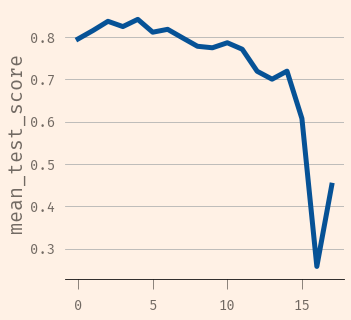

In [1]:
sns.lineplot(x=results.index, y=results.mean_test_score)
plt.show()

## Evaluation



In [1]:
y_predict = greg.best_estimator_.predict(X)
rmse = (np.sqrt(mean_squared_error(y, y_predict)))
r2 = r2_score(y, y_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# Out[34]:

## Save best model



In [1]:
with open('data/model.pkl', 'wb') as file:
    pickle.dump(greg.best_estimator_, file)

# Out[35]:

## Bibliography



### References:PROPERTIES:




[perceptrons.bib](perceptrons.bib)

